In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [7]:
movie = pd.read_csv(r"E:\movie rating\archive\IMDb Movies.csv",encoding='latin-1')

In [8]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
len(movie)

15509

In [10]:
movie.shape

(15509, 10)

In [11]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [12]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [13]:
movie.isna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [14]:
movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

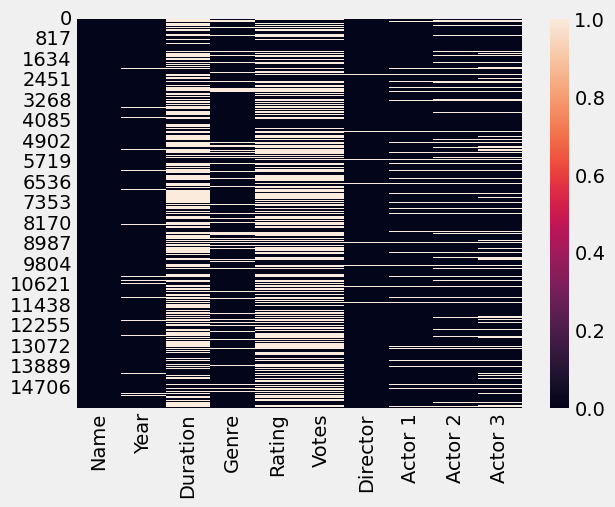

In [15]:
sns.heatmap(movie.isna())

In [16]:
percent_missing=movie.isna().sum()*100/len(movie)
print(percent_missing)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


In [17]:
nulls = movie[movie.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
movie.dropna(axis=0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [19]:
for col in movie.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(movie[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)'

In [20]:
movie.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [21]:
#dup_data=movie.duplicated().any()

In [22]:
#movie=movie.drop_duplicates()

In [23]:
movie.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5688,5688,5688,5659,5688.000000,5688,5688,5688,5688,5688
unique,5410,91,174,376,NaN,2027,2438,1974,2336,2572
top,Zindagi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,170,844,NaN,93,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.900738,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.379355,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [24]:
movie.describe(include='O')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,5688,5688,5688,5659,5688,5688,5688,5688,5688
unique,5410,91,174,376,2027,2438,1974,2336,2572
top,Zindagi,(2019),120 min,Drama,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,170,844,93,41,104,52,57


In [89]:
genre = movie['Genre']
genre.head(5)

0    Horror
1     Drama
2     Drama
3    Action
4     Drama
Name: Genre, dtype: object

In [91]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 148
Adventure: 13
Animation: 11
Biography: 6
Comedy: 182
Crime: 22
Documentary: 25
Drama: 803
Family: 28
Fantasy: 17
History: 6
Horror: 68
Music: 1
Musical: 8
Mystery: 16
Romance: 119
Sci-Fi: 3
Sport: 2
Thriller: 81
War: 3


In [92]:
genresPie = movie['Genre'].value_counts()
genresPie.head(5)

Drama       803
Comedy      182
Action      148
Romance     119
Thriller     81
Name: Genre, dtype: int64

In [118]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(5)

,Genre,Count
0,Drama,803
1,Comedy,182
2,Action,148
3,Romance,119
4,Thriller,81


In [119]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [120]:
movie['Votes'] = movie['Votes'].replace(',', '').astype(int)
movie["Votes"].head(5)

0     15
1     10
2     16
3     20
4    106
Name: Votes, dtype: int32

In [121]:
directors = movie["Director"].value_counts()
directors.head(5)

Kanti Shah                    13
Shyam Benegal                 12
Shantaram Rajaram Vankudre    11
Hrishikesh Mukherjee           8
Harmesh Malhotra               8
Name: Director, dtype: int64

In [122]:
actors = pd.concat([movie['Actor 1'], movie['Actor 2'], movie['Actor 3']]).dropna().value_counts()
actors.head(5)

Mithun Chakraborty    45
Dharmendra            29
Shabana Azmi          26
Ashok Kumar           24
Shatrughan Sinha      22
dtype: int64

In [123]:
movie['Year']= movie['Year'].replace(r'[()]', '' ,regex= True).astype(int)

In [124]:
movie['Duration'] = pd.to_numeric(movie['Duration'].replace(r' min', '', regex=True), errors='coerce')

In [125]:
movie['Genre'] = movie['Genre'].str.split(', ')
movie = movie.explode('Genre')
movie['Genre'].fillna(movie['Genre'].mode()[0], inplace=True)

In [126]:
movie["Votes"]=movie["Votes"].replace("$5.16M", 516)
movie["Votes"] = pd.to_numeric(movie['Votes'].str.replace(',',''))
movie.head()

AttributeError: Can only use .str accessor with string values!

In [ ]:
duplicate = movie.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)


In [127]:
duplicate.head(12)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,2005,142,Romance,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,2005,142,War,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
8,?: A Question Mark,2012,82,Mystery,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [128]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1560 non-null   object 
 1   Year      1560 non-null   int32  
 2   Duration  1560 non-null   int64  
 3   Genre     1560 non-null   object 
 4   Rating    1560 non-null   float64
 5   Votes     1560 non-null   int32  
 6   Director  1560 non-null   object 
 7   Actor 1   1560 non-null   object 
 8   Actor 2   1560 non-null   object 
 9   Actor 3   1560 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 121.9+ KB


In [129]:
movie= movie.drop_duplicates(subset=['Name'], keep=False)

In [130]:
movie.duplicated().value_counts()

False    1560
dtype: int64

In [131]:
movie = movie.drop(movie.index[0]).reset_index(drop=True)
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,18.11,2014,126,Action,3.5,10,Mohibul Haque,Rehal Khan,Gulshan Grover,Mukesh Tiwari
1,19 Revolutions,2004,94,Drama,4.5,16,Sridhar Reddy,Tarun Arora,Gulshan Grover,Vinay Pandey
2,1978: A Teen Night Out,2019,107,Thriller,4.0,20,Aziz Zee,Abuzar Akhtar,Apurva Godbole,Vaishnavi Kadam
3,1982 - A Love Marriage,2017,113,Comedy,5.5,106,Prashant Gore,Amitkumar Sharma,Omna,Rita Agarwal
4,2016 the End,2017,130,Comedy,6.1,94,Jaideep Chopra,Divyendu Sharma,Kiku Sharda,Harshad Chopda


In [132]:
movie.describe()

,Year,Duration,Rating,Votes
count,1559.000000,1559.000000,1559.000000,1559.000000
mean,1998.052598,123.989096,5.961321,550.864015
std,21.118768,25.346999,1.417717,4272.294439
min,1931.000000,45.000000,1.600000,5.000000
25%,1985.000000,107.000000,5.000000,14.000000
50%,2005.000000,126.000000,6.100000,35.000000
75%,2016.000000,140.000000,6.950000,128.500000
max,2021.000000,300.000000,9.400000,101014.000000


In [133]:
movie.describe(include='O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,1559,1559,1559,1559,1559,1559
unique,1559,20,1131,1021,1148,1175
top,18.11,Drama,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,801,13,22,12,16


In [134]:
movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [135]:
movie = movie.drop(movie.index[0]).reset_index(drop=True)
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,19 Revolutions,2004,94,Drama,4.5,16,Sridhar Reddy,Tarun Arora,Gulshan Grover,Vinay Pandey
1,1978: A Teen Night Out,2019,107,Thriller,4.0,20,Aziz Zee,Abuzar Akhtar,Apurva Godbole,Vaishnavi Kadam
2,1982 - A Love Marriage,2017,113,Comedy,5.5,106,Prashant Gore,Amitkumar Sharma,Omna,Rita Agarwal
3,2016 the End,2017,130,Comedy,6.1,94,Jaideep Chopra,Divyendu Sharma,Kiku Sharda,Harshad Chopda
4,22 Days,2018,124,Thriller,6.1,8,Shivam Tiwari,Rahul Dev,Shivam Tiwari,Sophia Singh


In [136]:
!pip install wordcloud

In [162]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install lightgbm

In [185]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sb
import plotly.express as px
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
colors=['red']


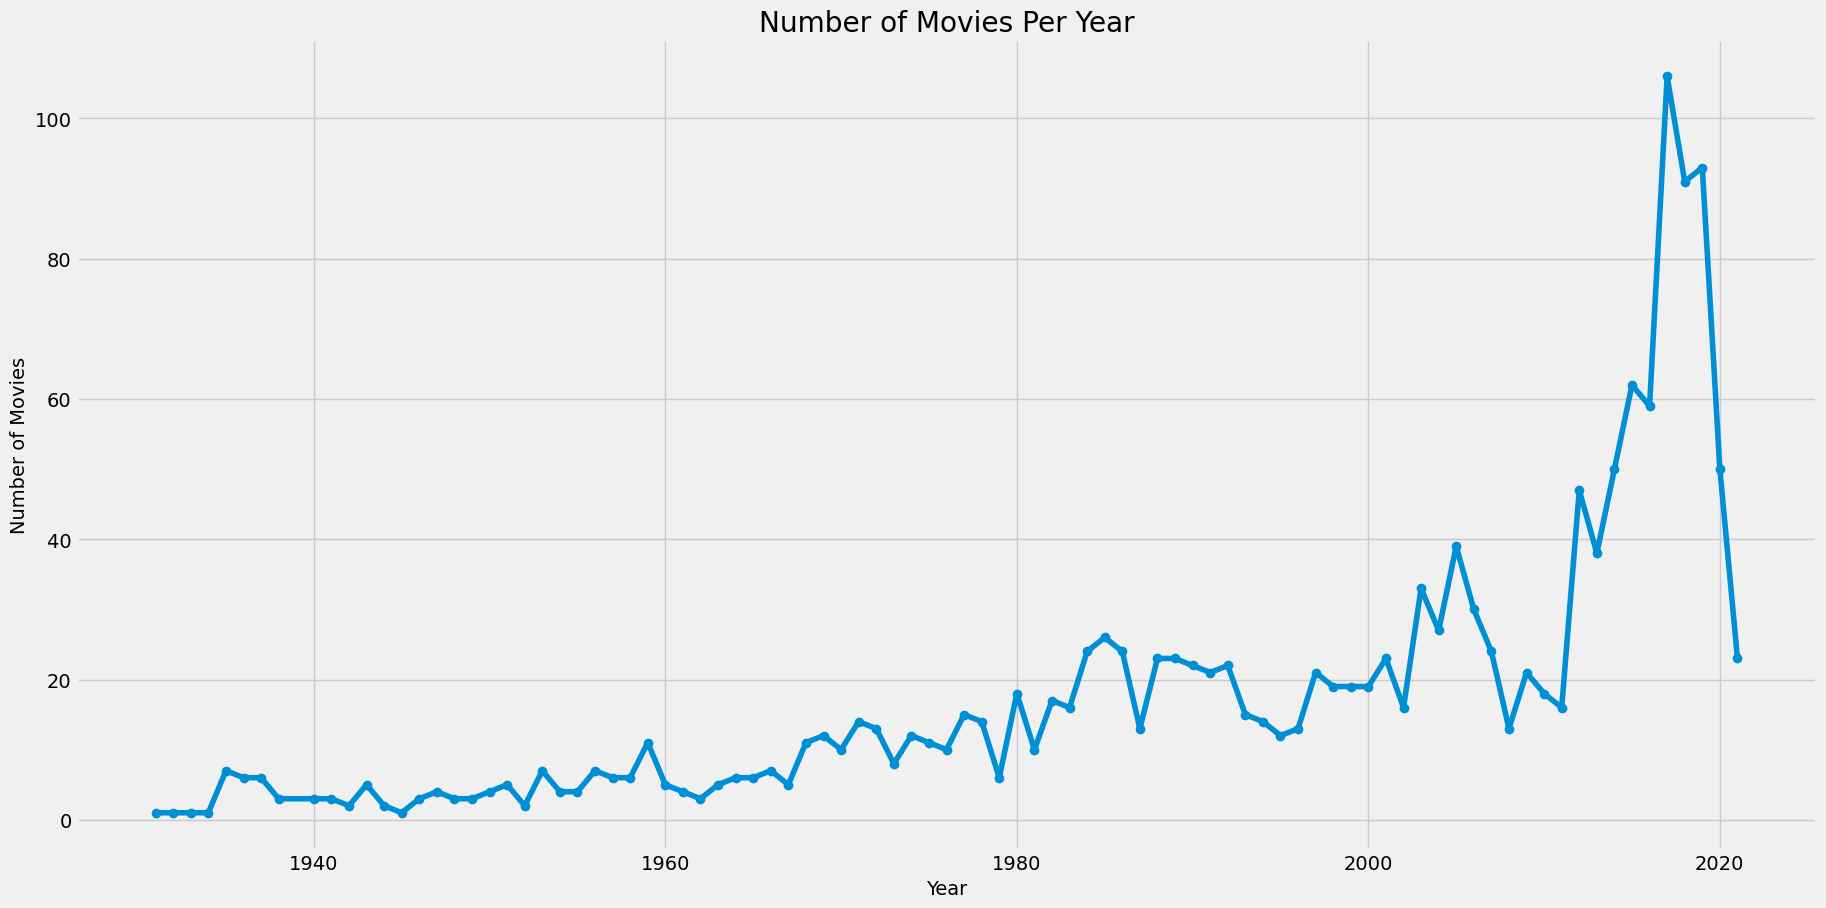

In [186]:
plt.figure(figsize=(20, 10))

year_counts = movie['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


plt.show()


In [187]:
fig_year = px.histogram(movie, x = 'Year', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(title='Distribution of Year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_year.show()


In [188]:
fig_rating = px.histogram(movie, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_rating.show()

In [189]:
fig_votes = px.box(movie, x = 'Votes', color_discrete_sequence = colors)
fig_votes.update_layout(title='Distribution of Votes', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Votes', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_votes.show()

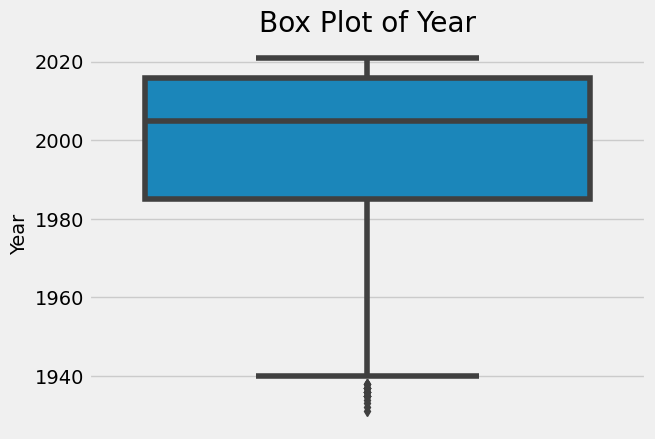

In [190]:
ax = sb.boxplot(data=movie, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
plt.show()

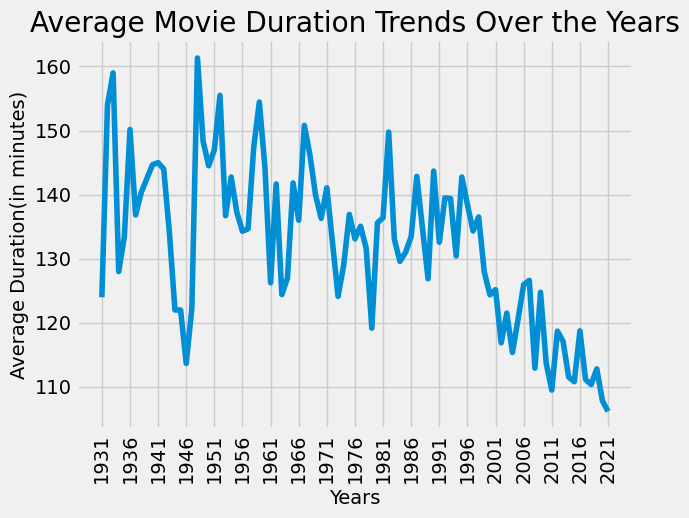

In [191]:
ax = sb.lineplot(data=movie.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(movie['Year']), max(movie['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

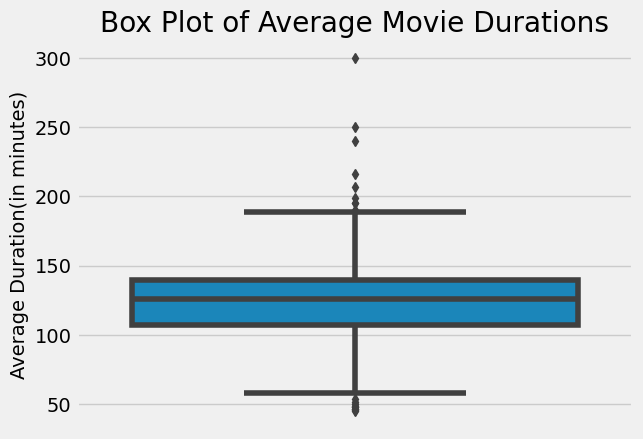

In [192]:
ax = sb.boxplot(data=movie, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

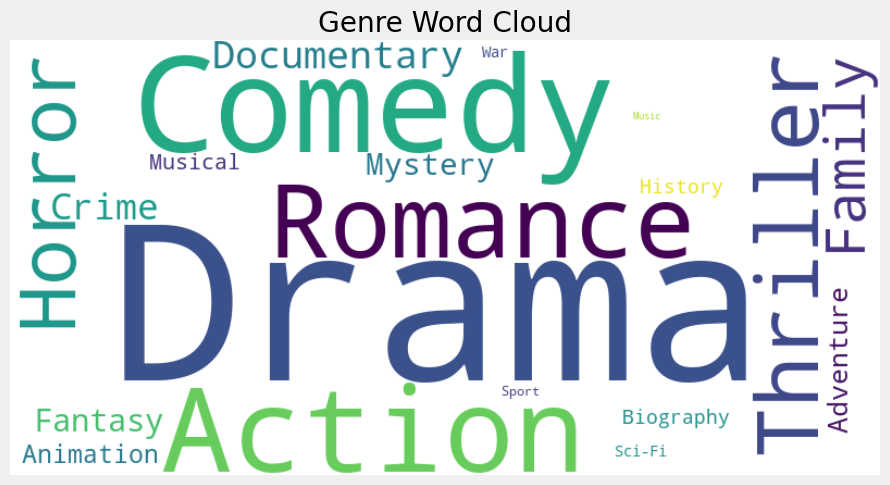

In [193]:
genre_counts = movie['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

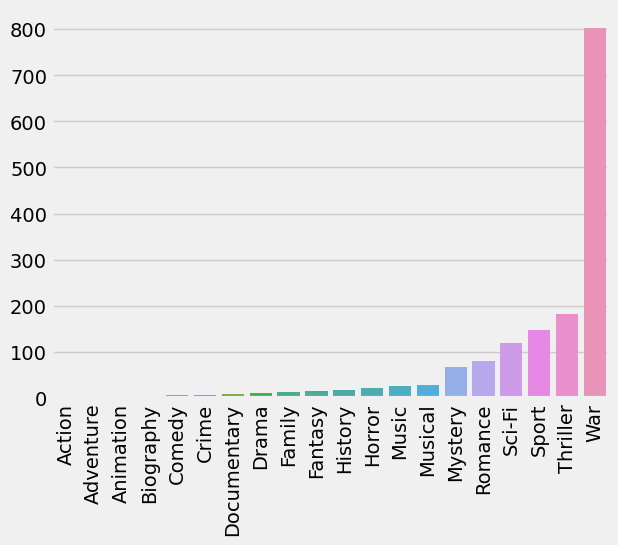

In [194]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sb.barplot(x = genreLabels, y = genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation = 90)
plt.show()

In [195]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

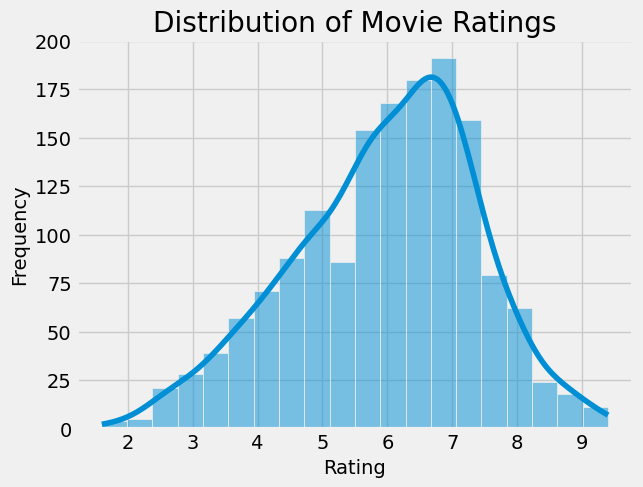

In [196]:
ax = sb.histplot(data = movie, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

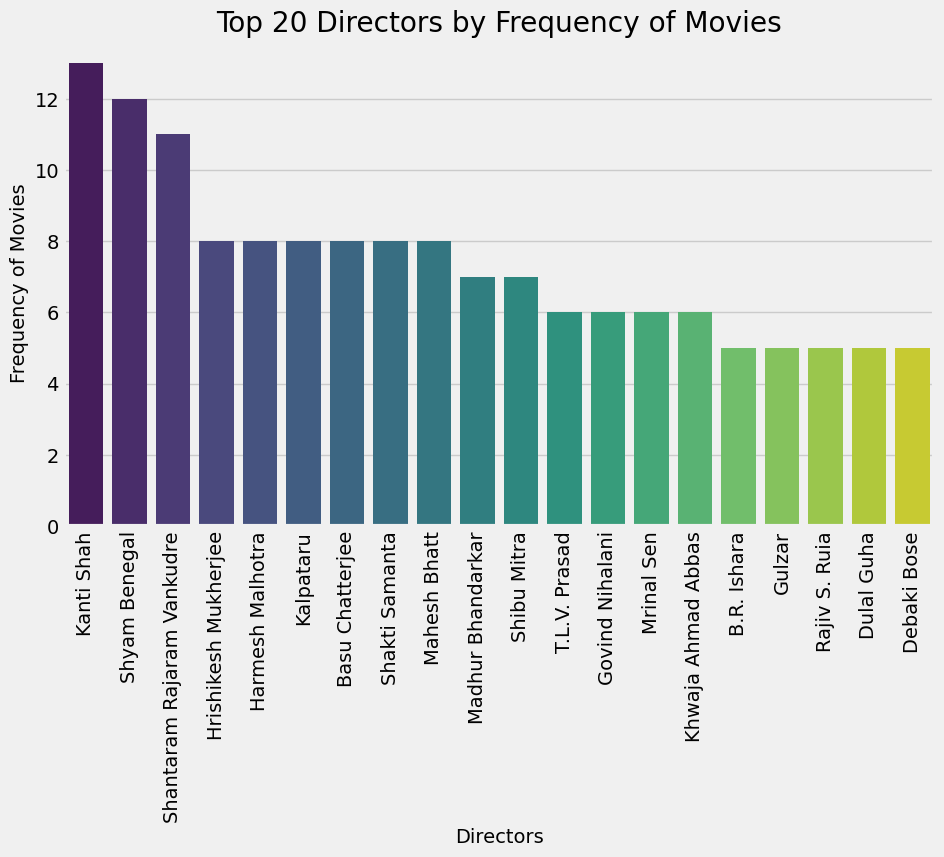

In [197]:
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

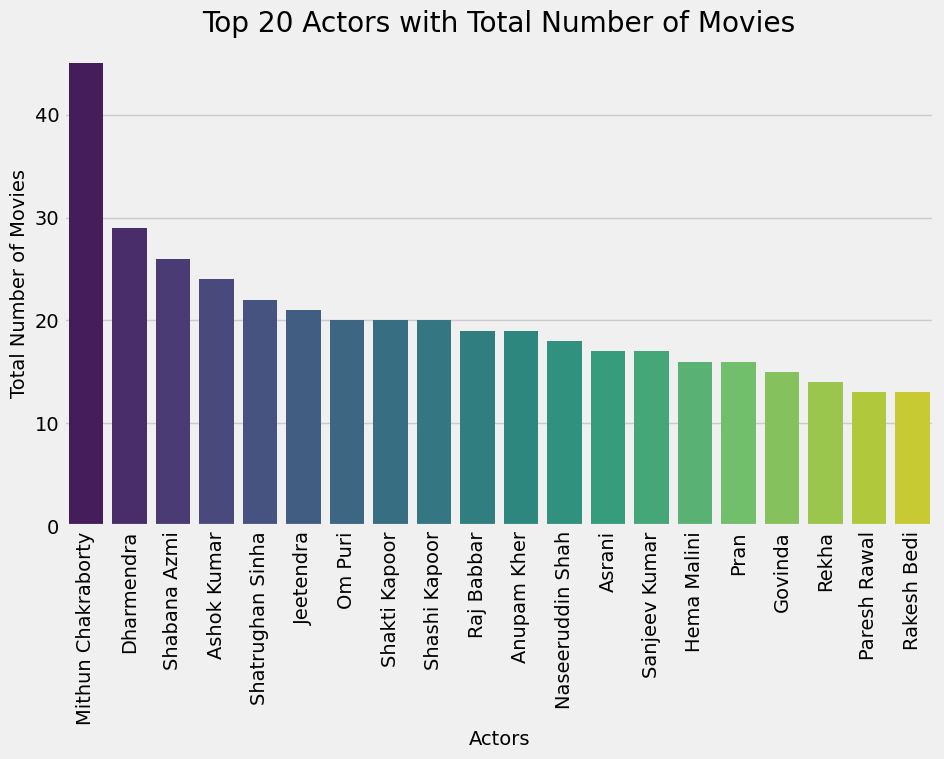

In [198]:
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [199]:
px.scatter(movie,x='Rating',y='Votes',color='Rating',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Rating Versus Votes')

In [200]:
Input = movie.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Output = movie['Rating']

In [201]:
Input.head(5)

,Year,Duration,Votes
0,2004,94,16
1,2019,107,20
2,2017,113,106
3,2017,130,94
4,2018,124,8


In [202]:
Output.head(5)

0    4.5
1    4.0
2    5.5
3    6.1
4    6.1
Name: Rating, dtype: float64

In [206]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [207]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [208]:
#pip install catboost

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [211]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*100, 2)

In [214]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

CBR = CatBoostRegressor(n_estimators=100, random_state=1, verbose=False)
CBR.fit(x_train, y_train)
catboost_preds = CBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 1246, number of used features: 3
[LightGBM] [Info] Start training from score 5.951124


In [215]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")
CBRScore = evaluate_model(y_test, catboost_preds, "CAT BOOST")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 2.62%
Mean Squared Error = 1.39

Model:  RANDOM FOREST
Accuracy = 14.10%
Mean Squared Error = 1.30

Model:  DECEISION TREE
Accuracy = -55.36%
Mean Squared Error = 1.75

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = -0.90%
Mean Squared Error = 1.41

Model:  GRADIENT BOOSTING
Accuracy = 18.08%
Mean Squared Error = 1.27

Model:  LIGHT GRADIENT BOOSTING
Accuracy = 16.70%
Mean Squared Error = 1.28

Model:  CAT BOOST
Accuracy = 16.98%
Mean Squared Error = 1.28

Model:  K NEAREST NEIGHBORS
Accuracy = 6.98%
Mean Squared Error = 1.35



In [216]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "Extended Gradient Boosting", "Light Gradient Boosting", "Cat Boosting", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, XGBScore, LGBScore, CBRScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
3,Gradient Boosting,18.08
6,Cat Boosting,16.98
5,Light Gradient Boosting,16.70
1,Random Forest,14.10
7,K Nearest Neighbors,6.98
0,Linear Regression,2.62
4,Extended Gradient Boosting,-0.90
2,Decision Tree,-55.36
